In [77]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Parameters CM/KG
age_mean = 34
age_std = 9
gender_ratio = 0.5
male_height_mean = 178.5
male_height_std = 7.5
female_height_mean = 165.1
female_height_std = 6.6
male_weight_mean = 85.2
male_weight_std = 13.9
female_weight_mean = 68.1
female_weight_std = 11.4

# Random seed for reproducibility
np.random.seed(42)

# Load in mergedDF for linear regression estimation of waist size
mergedDF = pd.read_csv('mergedDF.csv')
mergedDF.head()

,subject,gender,age,weight,height,bmi,waist
0,IEEEP1_12,1,23,51.1,161.0,19.713746,66.036617
1,IEEEP1_14,1,19,83.5,169.0,29.235671,97.067008
2,IEEEP1_13,1,18,66.6,168.6,23.429288,74.600192
3,IEEEP1_15,0,31,82.5,177.8,26.096991,92.151942
4,IEEEP1_18,0,26,67.5,166.3,24.407274,81.331458


In [78]:
# Generate age data
age = np.random.normal(age_mean, age_std, size=5000)
# Filter out ages below 18 and above 50
age = np.where(age < 18, 18, age)
age = np.where(age > 50, 50, age)

# Generate gender data at 50/50 ratio
gender = np.random.choice([0, 1], size=5000, p=[gender_ratio, 1 - gender_ratio]) # 0 is male, 1 is female
# Generate height data
male_heights = np.random.normal(male_height_mean + np.minimum(age, 30) * 0.23 - 14.6, male_height_std)
female_heights = np.random.normal(female_height_mean + np.minimum(age, 30) * 0.16 - 8.6, female_height_std)
heights = np.where(gender == 0, male_heights, female_heights)

# Generate weight data
male_weights = np.random.normal(male_weight_mean + (age * 0.35) - 29.3, male_weight_std)
female_weights = np.random.normal(female_weight_mean + (age * 0.27) - 16.7, female_weight_std)
weights = np.where(gender == 0, male_weights, female_weights)

# Create dataframe
df = pd.DataFrame({'age': age.round().astype(int), 'gender': gender, 'height': heights.round(1), 'weight': weights.round(1)})
df.head(100)

,age,gender,height,weight
0,38,0,163.8,59.9
1,33,0,166.7,74.4
2,40,0,168.7,68.5
3,48,0,178.7,66.6
4,32,0,162.1,70.7
...,...,...,...,...
95,21,1,159.5,62.6
96,37,1,156.1,52.0
97,36,1,155.0,56.8
98,34,1,163.2,77.2


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>]], dtype=object)

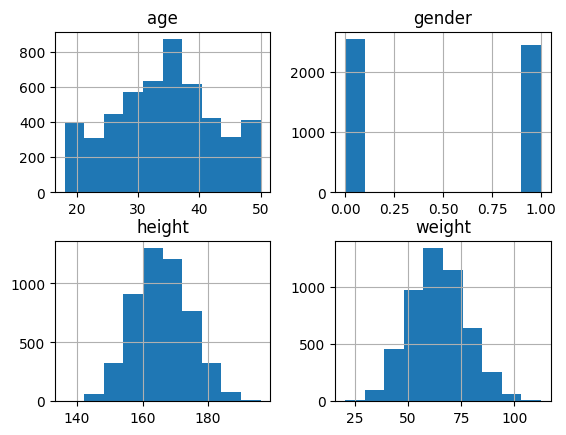

In [79]:
df.describe()
# See data distribution
df.hist()


In [80]:
# Predicting waist size using a linear regression model

def buildModel(DF):
    # Create linear regression model
    model = LinearRegression()
    # Fit model to data
    model.fit(DF[['height', 'weight', 'gender']], DF['waist'])
    return model

def predictWaist(model, df):
    # Predict waist size
    df['waist'] = model.predict(df[['height', 'weight', 'gender']])
    return df
    

In [81]:

# Add coulmn for BMI
df['bmi'] = ((df['weight'] / df['height'] / df['height'] ) * 10000).round(1)

# Add column for BMI category
df['bmi_category'] = np.where(df['bmi'] < 18.5, 'Underweight', np.where(df['bmi'] < 25, 'Normal', np.where(df['bmi'] < 30, 'Overweight', 'Obese')))

df = predictWaist(buildModel(mergedDF), df)

# Add body fat percentage column
# Found a potential formula for calculating body fat percentage, but it is not backed by any research
# df['body_fat_percentage'] = df.apply(lambda row: 0.5 * ((row['age'] * 0.1) + (row['bmi'] * 0.3)) + 0.5 * ((0.22 * row['age']) - (0.14 * row['weight']) + (0.17 * row['height']) + (8 * row['gender'])), axis=1)


# Add column for experience level, randomly 
df['experience_level'] = np.random.choice(['Beginner', 'Intermediate', 'Advanced'], size=5000, p=[0.4, 0.5, 0.1])

# Add column for goals, if BMI is underweight, then goal is to gain weight, if BMI is overweight or obese, then goal is to lose weight, normal BMI is to maintain weight

df.head(100)

,age,gender,height,weight,bmi,bmi_category,waist,experience_level
0,38,0,163.8,59.9,22.3,Normal,78.126667,Beginner
1,33,0,166.7,74.4,26.8,Overweight,88.851864,Advanced
2,40,0,168.7,68.5,24.1,Normal,83.306478,Intermediate
3,48,0,178.7,66.6,20.9,Normal,78.045033,Beginner
4,32,0,162.1,70.7,26.9,Overweight,87.549044,Beginner
...,...,...,...,...,...,...,...,...
95,21,1,159.5,62.6,24.6,Normal,80.421378,Beginner
96,37,1,156.1,52.0,21.3,Normal,73.056398,Beginner
97,36,1,155.0,56.8,23.6,Normal,77.372078,Beginner
98,34,1,163.2,77.2,29.0,Overweight,90.930779,Intermediate
